In [1]:
import os
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MultiLabelBinarizer, OneHotEncoder
import ast

from sklearn.model_selection import train_test_split

import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
import nltk

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /home/koen/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/koen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/koen/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
csv = os.path.join(os.getcwd(), 'data', 'metadata.csv')
df = pd.read_csv(csv)

In [3]:
df.head()

,id,type,title,genre,description,published_at,content_rating,rating_value,rating_count,duration,keywords,directors,actors
0,tt1981080,Movie,Tai ji 1: Cong ling kai shi,"['Action', 'Adventure', 'Drama']",Yang travels to Chen Village to learn a powerf...,2012-09-27,PG-13,6.0,5252.0,100.0,"['steampunk', 'steampunk fantasy', '3d', '3 di...",['Stephen Fung'],"['Hark-On Fung', 'Xiaochao Yuan', 'Stephen Fung']"
1,tt3043630,Movie,Xiao shi dai,"['Drama', 'Romance']",When four best friends try and move forward in...,2013-06-27,Not Rated,3.3,2424.0,116.0,"['friendship', 'money']",['Jingming Guo'],"['Mi Yang', 'Amber Kuo', 'Kai Ko']"
2,tt0316654,Movie,Spider-Man 2,"['Action', 'Adventure', 'Sci-Fi']",Peter Parker is beset with troubles in his fai...,2004-07-14,6,7.5,701690.0,127.0,"['spider man character', 'peter parker charact...",['Sam Raimi'],"['Tobey Maguire', 'Kirsten Dunst', 'Alfred Mol..."
3,tt0770752,Movie,Fool's Gold,"['Action', 'Adventure', 'Comedy']",A new clue to the whereabouts of a lost treasu...,2008-05-01,12,5.7,84085.0,112.0,"['treasure hunter', 'silt', 'mercenary', 'cari...",['Andy Tennant'],"['Matthew McConaughey', 'Kate Hudson', 'Donald..."
4,tt0772178,Movie,Kickin' It Old Skool,"['Comedy', 'Sport']",A young breakdancer hits his head during a tal...,2007-04-27,AL,4.6,7376.0,109.0,"['1980s', 'hospital room', 'homeless man', 'ca...",['Harvey Glazer'],"['Jamie Kennedy', 'Maria Menounos', 'Miguel A...."


### Data exploration

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8052 entries, 0 to 8051
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              8052 non-null   object 
 1   type            8052 non-null   object 
 2   title           8052 non-null   object 
 3   genre           8049 non-null   object 
 4   description     8030 non-null   object 
 5   published_at    7892 non-null   object 
 6   content_rating  7738 non-null   object 
 7   rating_value    8029 non-null   float64
 8   rating_count    8029 non-null   float64
 9   duration        8021 non-null   float64
 10  keywords        8052 non-null   object 
 11  directors       8052 non-null   object 
 12  actors          8052 non-null   object 
dtypes: float64(3), object(10)
memory usage: 817.9+ KB


In [5]:
df.isnull().sum()

id                  0
type                0
title               0
genre               3
description        22
published_at      160
content_rating    314
rating_value       23
rating_count       23
duration           31
keywords            0
directors           0
actors              0
dtype: int64

### Preprocessing

In [6]:
df.dropna(subset=['genre'], inplace=True)
df['type'] = df['type'].fillna('Unknown')
df['content_rating'] = df['content_rating'].fillna('Unknown')

In [7]:
one_hot_encoder = OneHotEncoder(sparse_output=False)
type_content_encoded = one_hot_encoder.fit_transform(df[['type', 'content_rating']])

# Generate column names for the encoded features
type_content_column_names = one_hot_encoder.get_feature_names_out(['type', 'content_rating'])

# Create a DataFrame for the encoded features
encoded_df = pd.DataFrame(type_content_encoded, columns=type_content_column_names)

# Drop the original columns from df
df.drop(['type', 'content_rating'], axis=1, inplace=True)

# Reset index on both DataFrames to ensure they concatenate correctly
df.reset_index(drop=True, inplace=True)
encoded_df.reset_index(drop=True, inplace=True)

# Concatenate the original DataFrame (without the encoded columns) with the new encoded DataFrame
df = pd.concat([df, encoded_df], axis=1)

# Show the updated DataFrame
df.head()

,id,title,genre,description,published_at,rating_value,rating_count,duration,keywords,directors,...,content_rating_R,content_rating_T,content_rating_TV-14,content_rating_TV-G,content_rating_TV-MA,content_rating_TV-PG,content_rating_TV-Y,content_rating_TV-Y7,content_rating_Unknown,content_rating_Unrated
0,tt1981080,Tai ji 1: Cong ling kai shi,"['Action', 'Adventure', 'Drama']",Yang travels to Chen Village to learn a powerf...,2012-09-27,6.0,5252.0,100.0,"['steampunk', 'steampunk fantasy', '3d', '3 di...",['Stephen Fung'],...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,tt3043630,Xiao shi dai,"['Drama', 'Romance']",When four best friends try and move forward in...,2013-06-27,3.3,2424.0,116.0,"['friendship', 'money']",['Jingming Guo'],...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,tt0316654,Spider-Man 2,"['Action', 'Adventure', 'Sci-Fi']",Peter Parker is beset with troubles in his fai...,2004-07-14,7.5,701690.0,127.0,"['spider man character', 'peter parker charact...",['Sam Raimi'],...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,tt0770752,Fool's Gold,"['Action', 'Adventure', 'Comedy']",A new clue to the whereabouts of a lost treasu...,2008-05-01,5.7,84085.0,112.0,"['treasure hunter', 'silt', 'mercenary', 'cari...",['Andy Tennant'],...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,tt0772178,Kickin' It Old Skool,"['Comedy', 'Sport']",A young breakdancer hits his head during a tal...,2007-04-27,4.6,7376.0,109.0,"['1980s', 'hospital room', 'homeless man', 'ca...",['Harvey Glazer'],...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8049 entries, 0 to 8048
Data columns (total 42 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        8049 non-null   object 
 1   title                     8049 non-null   object 
 2   genre                     8049 non-null   object 
 3   description               8027 non-null   object 
 4   published_at              7890 non-null   object 
 5   rating_value              8026 non-null   float64
 6   rating_count              8026 non-null   float64
 7   duration                  8018 non-null   float64
 8   keywords                  8049 non-null   object 
 9   directors                 8049 non-null   object 
 10  actors                    8049 non-null   object 
 11  type_Movie                8049 non-null   float64
 12  type_TVEpisode            8049 non-null   float64
 13  type_TVSeries             8049 non-null   float64
 14  type_Vid

In [9]:
df['genre'] = df['genre'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else ['Unknown'])

mlb = MultiLabelBinarizer()
genre_encoded = mlb.fit_transform(df['genre'])
encoded_genres_df = pd.DataFrame(genre_encoded, columns=mlb.classes_)
df.drop('genre', axis=1, inplace=True)

df.reset_index(drop=True, inplace=True)
encoded_genres_df.reset_index(drop=True, inplace=True)

df = pd.concat([df, encoded_genres_df], axis=1)

df.head()

,id,title,description,published_at,rating_value,rating_count,duration,keywords,directors,actors,...,Mystery,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,tt1981080,Tai ji 1: Cong ling kai shi,Yang travels to Chen Village to learn a powerf...,2012-09-27,6.0,5252.0,100.0,"['steampunk', 'steampunk fantasy', '3d', '3 di...",['Stephen Fung'],"['Hark-On Fung', 'Xiaochao Yuan', 'Stephen Fung']",...,0,0,0,0,0,0,0,0,0,0
1,tt3043630,Xiao shi dai,When four best friends try and move forward in...,2013-06-27,3.3,2424.0,116.0,"['friendship', 'money']",['Jingming Guo'],"['Mi Yang', 'Amber Kuo', 'Kai Ko']",...,0,0,0,1,0,0,0,0,0,0
2,tt0316654,Spider-Man 2,Peter Parker is beset with troubles in his fai...,2004-07-14,7.5,701690.0,127.0,"['spider man character', 'peter parker charact...",['Sam Raimi'],"['Tobey Maguire', 'Kirsten Dunst', 'Alfred Mol...",...,0,0,0,0,1,0,0,0,0,0
3,tt0770752,Fool's Gold,A new clue to the whereabouts of a lost treasu...,2008-05-01,5.7,84085.0,112.0,"['treasure hunter', 'silt', 'mercenary', 'cari...",['Andy Tennant'],"['Matthew McConaughey', 'Kate Hudson', 'Donald...",...,0,0,0,0,0,0,0,0,0,0
4,tt0772178,Kickin' It Old Skool,A young breakdancer hits his head during a tal...,2007-04-27,4.6,7376.0,109.0,"['1980s', 'hospital room', 'homeless man', 'ca...",['Harvey Glazer'],"['Jamie Kennedy', 'Maria Menounos', 'Miguel A....",...,0,0,0,0,0,0,1,0,0,0


In [10]:
genre_counts = encoded_genres_df.sum().sort_values(ascending=False)

/tmp/ipykernel_89058/2201289770.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index, palette="viridis")


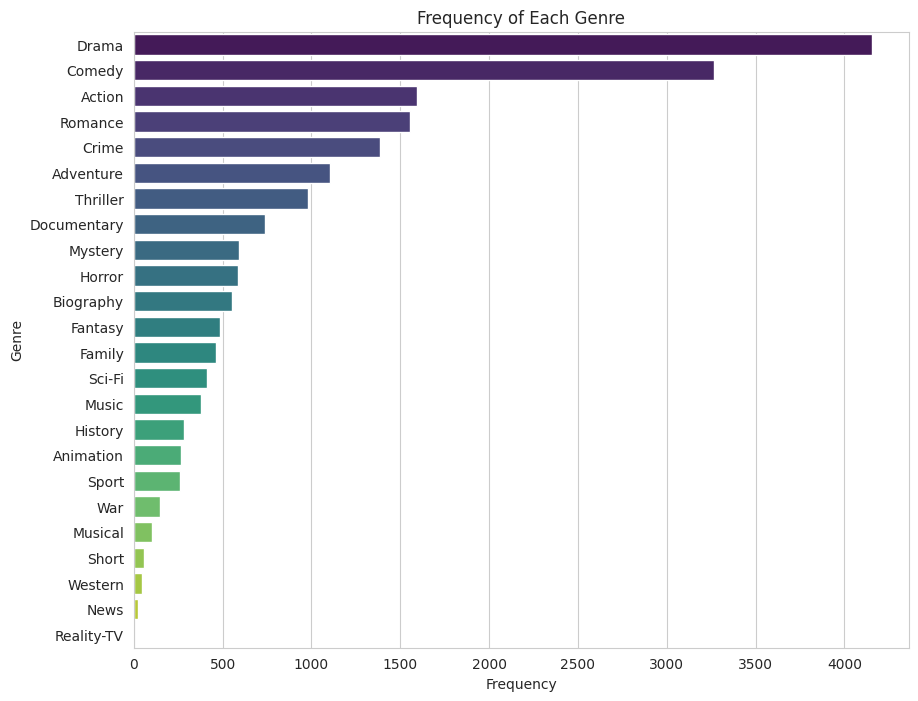

In [12]:
# Set the visual style of the plots
sns.set_style("whitegrid")

# Bar Plot
plt.figure(figsize=(10, 8))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette="viridis")
plt.title('Frequency of Each Genre')
plt.xlabel('Frequency')
plt.ylabel('Genre')
plt.show()

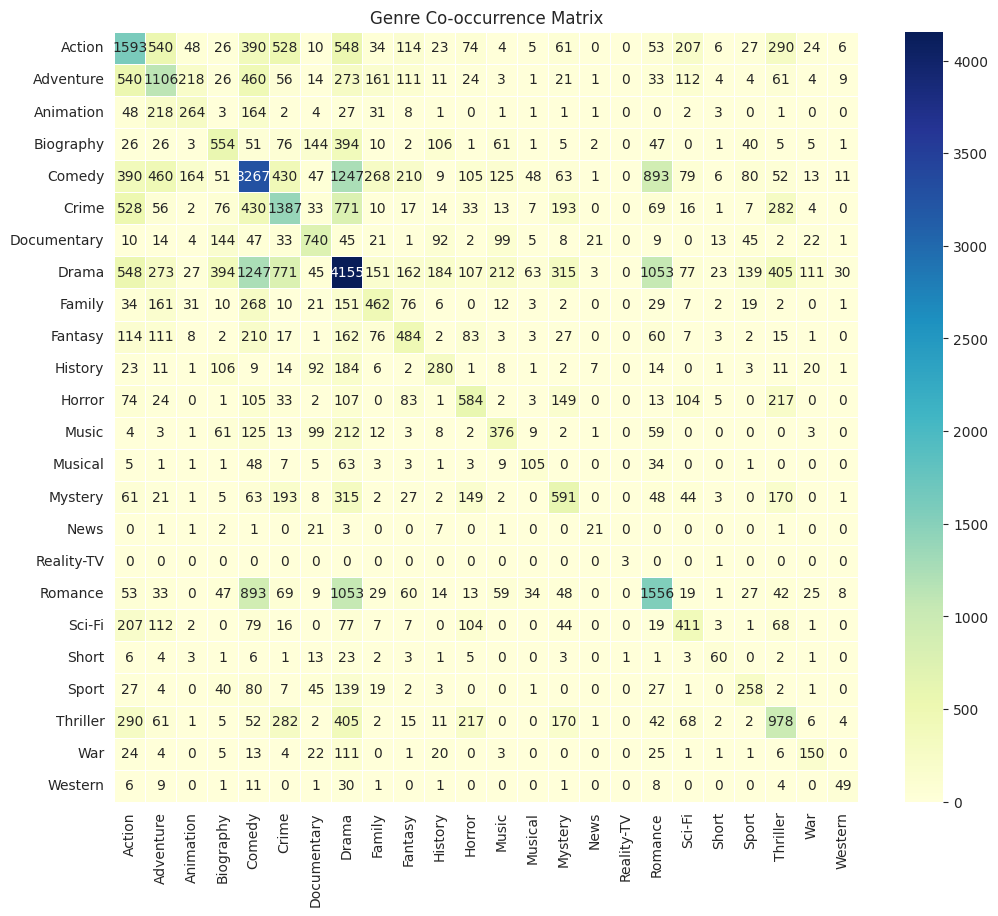

In [13]:
genre_cooccurrence_matrix = encoded_genres_df.T.dot(encoded_genres_df)

# Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(genre_cooccurrence_matrix, cmap="YlGnBu", annot=True, fmt="d", linewidths=.5)
plt.title('Genre Co-occurrence Matrix')
plt.show()

/tmp/ipykernel_89058/2978187724.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index, palette="viridis", ax=ax0)


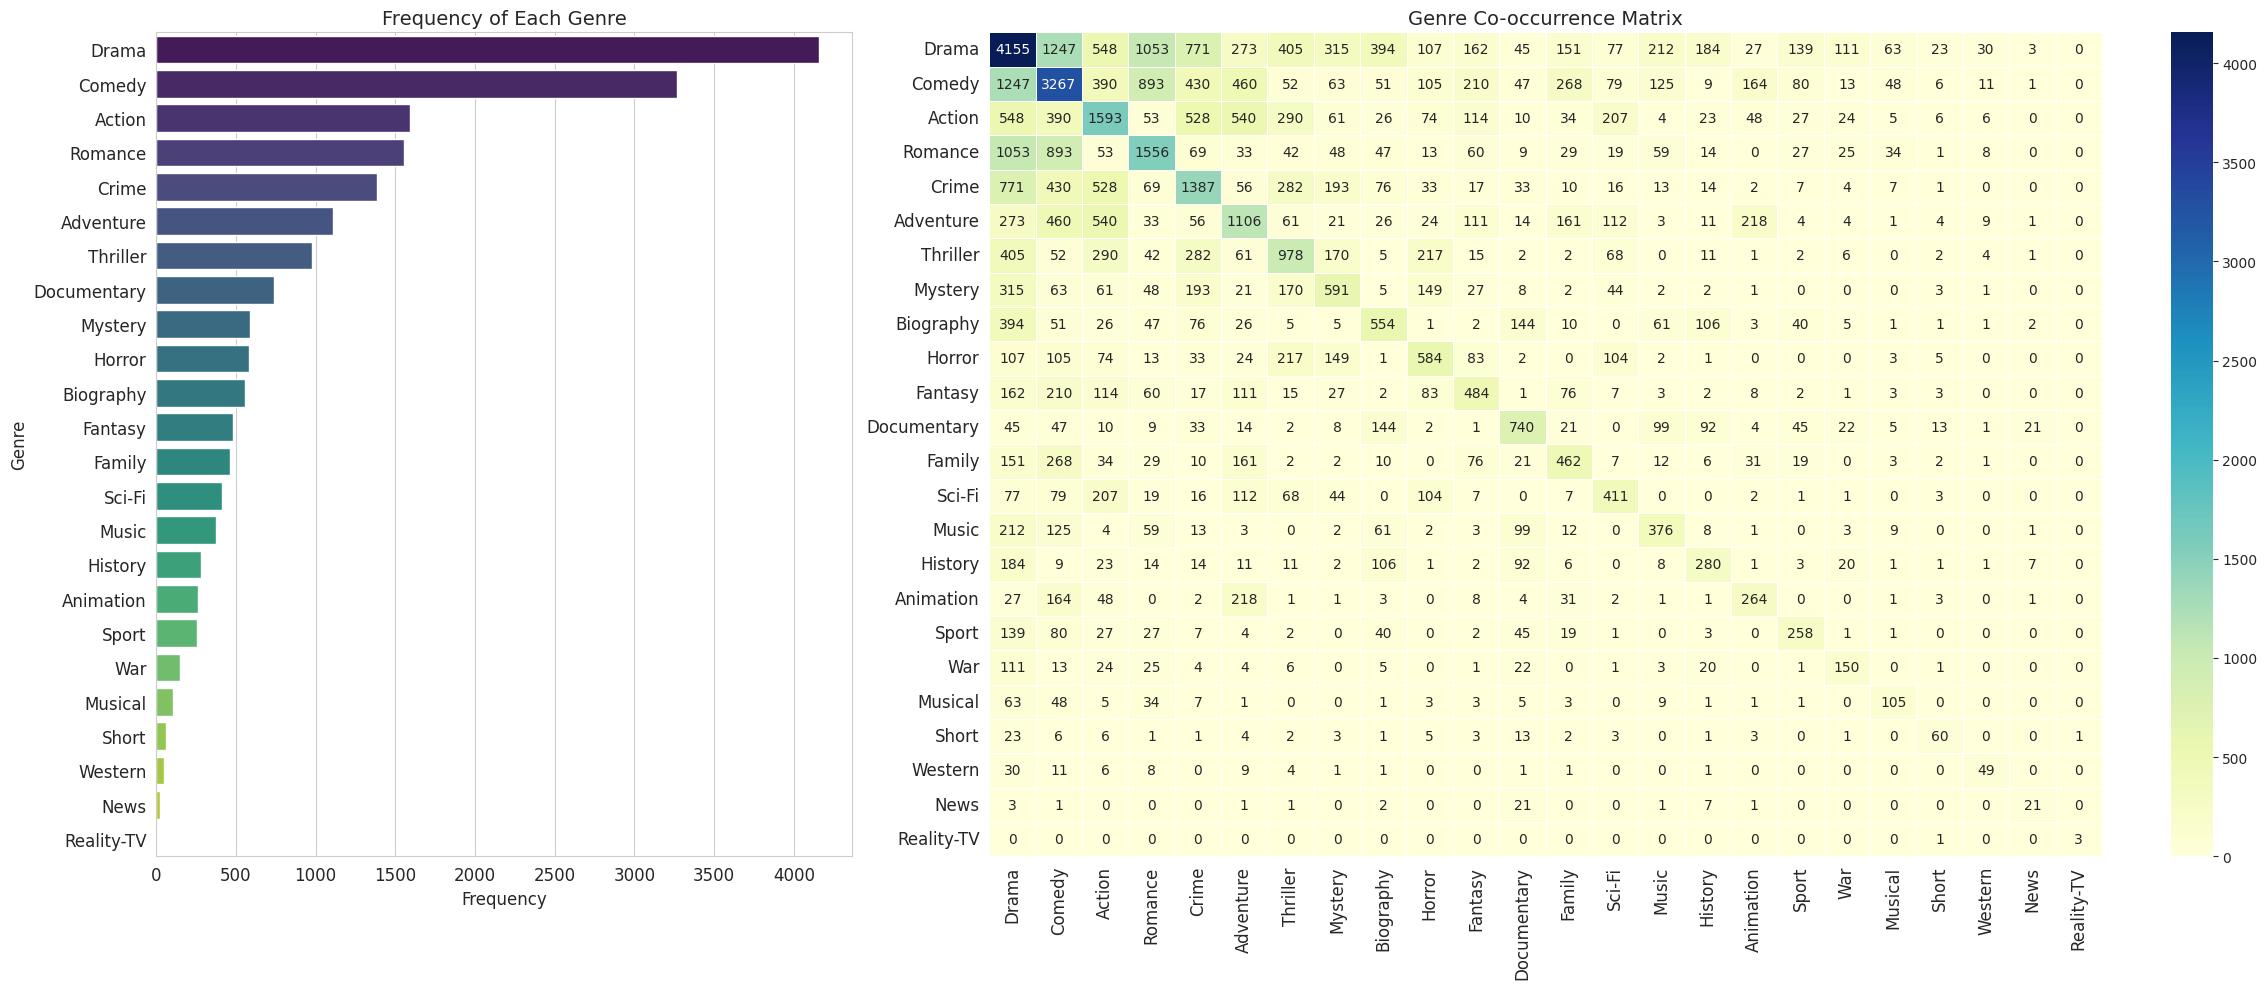

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Assuming 'encoded_genres_df' and 'genre_counts' are predefined
# Calculate the genre co-occurrence matrix
genre_cooccurrence_matrix = encoded_genres_df.T.dot(encoded_genres_df)
genre_occurrences = genre_cooccurrence_matrix.sum(axis=1)
sorted_genres = genre_occurrences.sort_values(ascending=False).index
sorted_cooccurrence_matrix = genre_cooccurrence_matrix.loc[sorted_genres, sorted_genres]

sns.set_style("whitegrid")
fig = plt.figure(figsize=(24, 10))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 2])

# Bar Plot
ax0 = plt.subplot(gs[0])
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette="viridis", ax=ax0)
ax0.set_title('Frequency of Each Genre', fontsize=14)  # Adjust title font size
ax0.set_xlabel('Frequency', fontsize=12)  # Adjust X-axis label font size
ax0.set_ylabel('Genre', fontsize=12)  # Adjust Y-axis label font size
ax0.tick_params(axis='both', which='major', labelsize=12)  # Adjust tick label font size

# Heatmap
ax1 = plt.subplot(gs[1])
sns.heatmap(sorted_cooccurrence_matrix, cmap="YlGnBu", annot=True, fmt="d", linewidths=.5, ax=ax1, annot_kws={"size": 10})
ax1.set_title('Genre Co-occurrence Matrix', fontsize=14)
ax1.tick_params(axis='y', which='major', labelsize=12)  # Adjust Y-axis tick label font size
ax1.tick_params(axis='x', which='major', labelsize=12)  # Adjust X-axis tick label font size

plt.tight_layout()
plt.show()


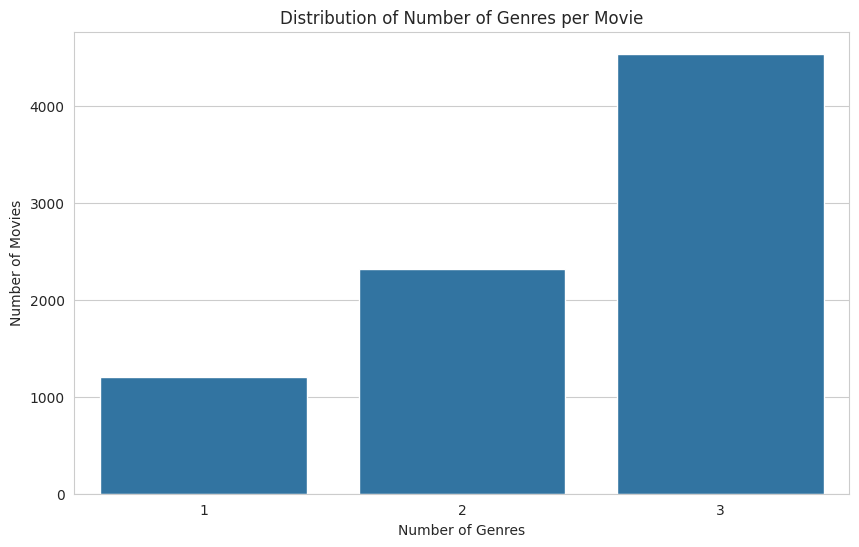

In [65]:
num_genres_per_movie = encoded_genres_df.sum(axis=1)

plt.figure(figsize=(10, 6))
sns.countplot(x=num_genres_per_movie)
plt.title('Distribution of Number of Genres per Movie')
plt.xlabel('Number of Genres')
plt.ylabel('Number of Movies')
plt.show()

In [73]:
text_data = df['description']

# Text cleaning function
def clean_text(text):
    text = str(text)

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Convert text to lowercase
    text = text.lower()
    # Remove numbers
    text = ''.join([i for i in text if not i.isdigit()])
    # Tokenization
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [w for w in tokens if not w in stop_words]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(w) for w in tokens]
    return " ".join(tokens)

df['cleaned_text'] = df['description'].apply(clean_text)

IndexError: index 6 is out of bounds for axis 0 with size 6

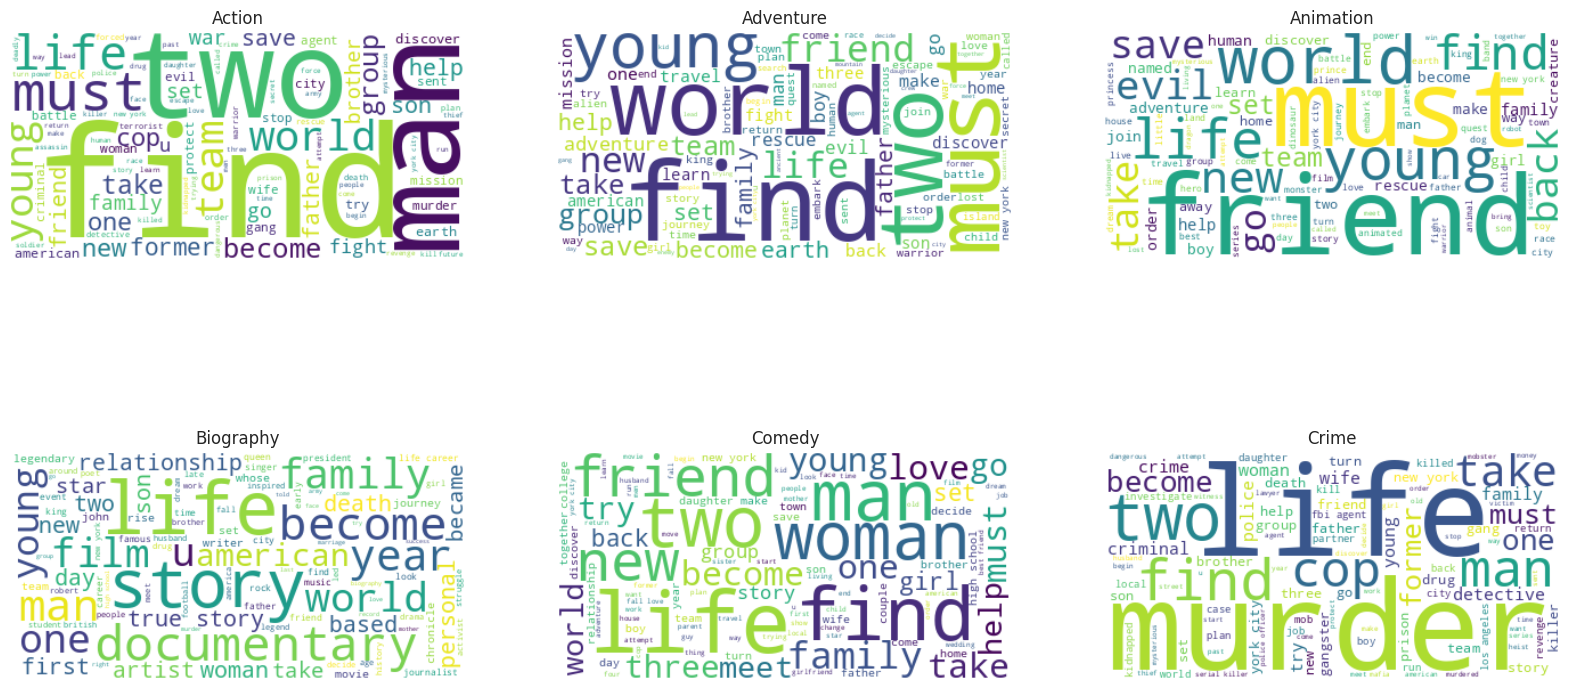

In [77]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

genre_counts = encoded_genres_df.sum().sort_values(ascending=False)
top_genres = genre_counts.head(6).index

for genre in top_genres:
    # Filter the main DataFrame for movies of the current genre
    genre_movies = df[encoded_genres_df[genre] == 1]
    # Aggregate cleaned text
    genre_text[genre] = " ".join(genre_movies['cleaned_text'])

# Create subplots for the 6 most occurring genres
fig, axs = plt.subplots(2, 3, figsize=(20, 10))

# Flatten the array of axes for easy iterating
axs = axs.flatten()

for i, (genre, text) in enumerate(genre_text.items()):
    wordcloud = WordCloud(background_color='white', max_words=100, contour_width=3, contour_color='steelblue').generate(text)
    axs[i].imshow(wordcloud, interpolation='bilinear')
    axs[i].set_title(genre)
    axs[i].axis('off')

plt.tight_layout()
plt.show()

### Feature extraction

### Model

In [66]:
# X_train, X_test, y_train, y_test = train_test_split()